In [1]:
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Drama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

## 1. Представление и предобработка текстовых данных в виде последовательностей

1.1 Представьте первое предложение из строки `text` как последовательность из индексов слов, входящих в это предложение

In [4]:
text = 'Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. Note that LibTorch is only available for C++'

sentences = sent_tokenize(text)
first_sentence = sentences[0]
tokens = word_tokenize(first_sentence)
word_to_index = {word: idx for idx, word in enumerate(tokens)}
sequence_of_indexes = [word_to_index[word] for word in tokens]

sequence_of_indexes

[0, 1, 2, 3, 4, 5, 6, 7, 8]

1.2 Представьте первое предложение из строки `text` как последовательность векторов, соответствующих индексам слов. Для представления индекса в виде вектора используйте унитарное кодирование. В результате должен получиться двумерный тензор размера `количество слов в предложении` x `количество уникальных слов`

In [5]:
text = 'Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. Note that LibTorch is only available for C++'

sentences = sent_tokenize(text)
first_sentence = sentences[0]
tokens = [word.lower() for word in word_tokenize(first_sentence) if word.isalnum()]
unique_words = set(tokens)
word_to_index = {word: idx for idx, word in enumerate(unique_words)}
one_hot_encoding = np.eye(len(unique_words))
word_vectors = np.array([one_hot_encoding[word_to_index[word]] for word in tokens])

word_vectors

array([[0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]])

1.3 Решите задачу 1.2, используя модуль `nn.Embedding`

In [6]:
text = 'Select your preferences and run the install command. Stable represents the most currently tested and supported version of PyTorch. Note that LibTorch is only available for C++'

sentences = sent_tokenize(text)
first_sentence = sentences[0]
tokens = [word.lower() for word in word_tokenize(first_sentence) if word.isalnum()]
unique_words = list(dict.fromkeys(tokens))
word_to_index = {word: idx for idx, word in enumerate(unique_words)}
indexed_tokens = [word_to_index[word] for word in tokens]
indexed_tensor = torch.tensor(indexed_tokens, dtype=torch.long)
embedding_dim = 10 
embedding_layer = nn.Embedding(len(unique_words), embedding_dim)
word_vectors = embedding_layer(indexed_tensor)

word_vectors

tensor([[ 0.1650,  1.1662, -0.0837,  0.5136,  0.4755,  1.5697, -1.0102,  1.2575,
          0.0963,  1.1838],
        [-1.6277,  0.7302,  1.5127,  0.1846, -0.5610, -0.6797,  1.3248,  0.4591,
         -0.1578,  1.0687],
        [ 1.2768, -1.6858, -0.5727, -0.8838, -1.1076, -0.1470,  0.2227, -0.0392,
         -1.2817, -1.3773],
        [-1.4874,  1.1352, -0.3917, -0.0207, -0.3184, -0.2866, -1.3257, -0.0559,
          1.8358, -0.3240],
        [-1.2045,  3.3501,  0.5972, -0.3265, -0.7527, -0.5920, -1.2816, -0.7266,
          0.4139,  1.8475],
        [-1.3423, -1.2063,  0.5683,  0.4480,  0.5944, -0.0163,  0.1463, -0.0174,
         -1.0010,  0.4697],
        [-2.4340,  1.6492, -0.8198,  0.2016,  1.9536,  0.3505, -0.6398,  1.4932,
          0.1889,  2.8398],
        [-0.4275, -1.8136, -1.3542,  0.2278, -1.4079, -1.3471, -0.1558,  0.2215,
         -0.6371, -0.1093]], grad_fn=<EmbeddingBackward0>)

## 2. Классификация фамилий по национальности (ConvNet)

Датасет: https://disk.yandex.ru/d/owHew8hzPc7X9Q?w=1

2.1 Считать файл `surnames/surnames.csv`. 

2.2 Закодировать национальности числами, начиная с 0.

2.3 Разбить датасет на обучающую и тестовую выборку

2.4 Реализовать класс `Vocab` (токен = __символ__)
  * добавьте в словарь специальный токен `<PAD>` с индексом 0
  * при создании словаря сохраните длину самой длинной последовательности из набора данных в виде атрибута `max_seq_len`

2.5 Реализовать класс `SurnamesDataset`
  * метод `__getitem__` возвращает пару: <последовательность индексов токенов (см. 1.1 ), номер класса> 
  * длина каждой такой последовательности должна быть одинаковой и равной `vocab.max_seq_len`. Чтобы добиться этого, дополните последовательность справа индексом токена `<PAD>` до нужной длины

2.6. Обучить классификатор.
  
  * Для преобразования последовательности индексов в последовательность векторов используйте `nn.Embedding`. Рассмотрите два варианта: 
    - когда токен представляется в виде унитарного вектора и модуль `nn.Embedding` не обучается
    - когда токен представляется в виде вектора небольшой размерности (меньше, чем размер словаря) и модуль `nn.Embedding` обучается

  * Используйте одномерные свертки и пулинг (`nn.Conv1d`, `nn.MaxPool1d`)
    - обратите внимание, что `nn.Conv1d` ожидает на вход трехмерный тензор размерности `(batch, embedding_dim, seq_len)`

2.7 Измерить точность на тестовой выборке. Проверить работоспособность модели: прогнать несколько фамилий студентов группы через модели и проверить результат. Для каждой фамилии выводить 3 наиболее вероятных предсказания.

In [7]:
data = pd.read_csv('surnames.csv')

class_mapping = {nationality: idx for idx, nationality in enumerate(data['nationality'].unique())}
data['nationality'] = data['nationality'].map(class_mapping)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

class Vocab:
    def __init__(self, data):
        self.char_to_index = {char: idx + 1 for idx, char in enumerate(set(' '.join(data['surname'])))}
        self.char_to_index['<PAD>'] = 0
        self.index_to_char = {idx: char for char, idx in self.char_to_index.items()}
        self.max_seq_len = max(data['surname'].apply(len))

class SurnamesDataset(Dataset):
    def __init__(self, data, vocab):
        self.data = data
        self.vocab = vocab

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        surname = self.data.iloc[idx]['surname']
        nationality = self.data.iloc[idx]['nationality']
        
        indexed_sequence = [vocab.char_to_index[char] for char in surname]
        indexed_sequence += [vocab.char_to_index['<PAD>']] * (vocab.max_seq_len - len(surname))
        
        return torch.tensor(indexed_sequence), nationality


In [8]:
vocab = Vocab(data)
train_dataset = SurnamesDataset(train_data, vocab)
test_dataset = SurnamesDataset(test_data, vocab)

In [9]:
class CNNClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_classes):
        super(CNNClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1 = nn.Conv1d(embedding_dim, 128, kernel_size=3)
        self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(128, 64, kernel_size=3)
        self.pool2 = nn.MaxPool1d(3)
        self.fc1 = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)  # Переставляем размерности для Conv1d
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        return x


In [10]:
def train_model(model, train_loader, criterion, optimizer, num_epochs, test_loader=None):
    train_losses = []
    test_losses = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        avg_train_loss = running_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        if test_loader is not None:
            avg_test_loss = test_model(model, test_loader, criterion)
            test_losses.append(avg_test_loss)

        print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {avg_test_loss:.4f}')

    return train_losses, test_losses

def test_model(model, test_loader, criterion):
    model.eval()
    running_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()

    avg_test_loss = running_loss / len(test_loader)
    return avg_test_loss

In [11]:
vocab_size = len(vocab.char_to_index)
embedding_dim = 10
num_classes = len(class_mapping)

model = CNNClassifier(vocab_size, embedding_dim, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 15
batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_losses, test_losses = train_model(model, train_loader, criterion, optimizer, num_epochs, test_loader)

Epoch [1/15], Train Loss: 2.0066, Test Loss: 1.7266
Epoch [2/15], Train Loss: 1.5112, Test Loss: 1.3993
Epoch [3/15], Train Loss: 1.2419, Test Loss: 1.2288
Epoch [4/15], Train Loss: 1.0916, Test Loss: 1.1372
Epoch [5/15], Train Loss: 0.9899, Test Loss: 1.0718
Epoch [6/15], Train Loss: 0.9153, Test Loss: 1.0063
Epoch [7/15], Train Loss: 0.8588, Test Loss: 0.9984
Epoch [8/15], Train Loss: 0.8061, Test Loss: 0.9471
Epoch [9/15], Train Loss: 0.7688, Test Loss: 0.9420
Epoch [10/15], Train Loss: 0.7261, Test Loss: 0.9350
Epoch [11/15], Train Loss: 0.6885, Test Loss: 0.9459
Epoch [12/15], Train Loss: 0.6561, Test Loss: 0.9166
Epoch [13/15], Train Loss: 0.6290, Test Loss: 0.9004
Epoch [14/15], Train Loss: 0.6069, Test Loss: 0.8989
Epoch [15/15], Train Loss: 0.5916, Test Loss: 0.9035


In [12]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 74.68%


In [13]:
def plot_confusion_matrix(model, test_loader, class_mapping):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            all_labels.extend(labels.tolist())
            all_predictions.extend(predicted.tolist())

    cm = confusion_matrix(all_labels, all_predictions)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

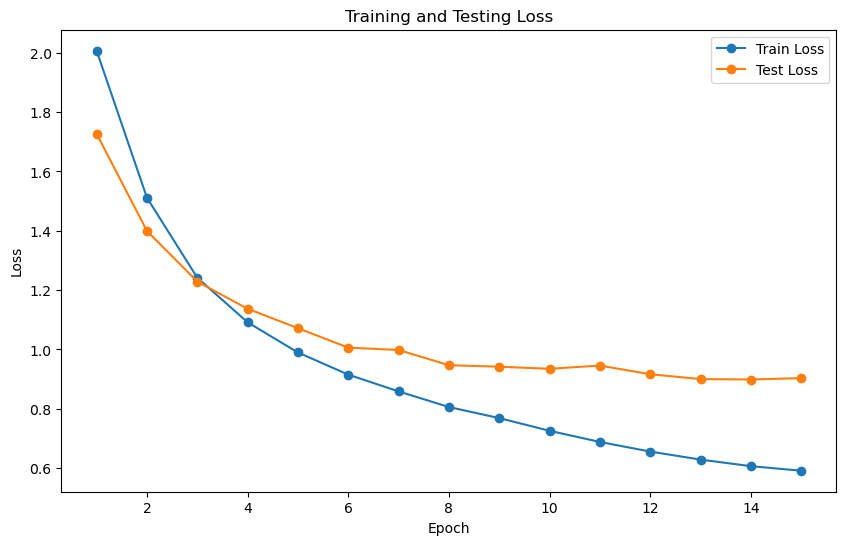

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', marker='o')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

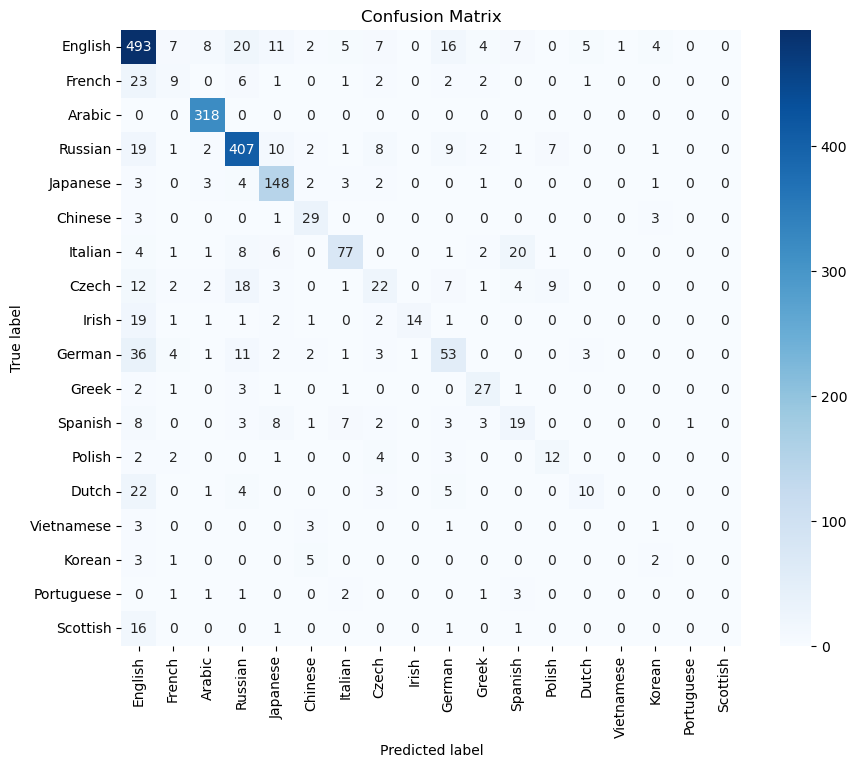

In [15]:
plot_confusion_matrix(model, test_loader, class_mapping)

In [16]:
student_surnames = ['Akhmad', 'Kozlov', 'Sysoev', 'Makhovoy', 'Chevachin', 'Poley', 'Fesenko', 'Gusev',  'Ivanov', 'Vnukovskaya', 'Epifanova', 'Kvartalova']
indexed_surnames = []
for surname in student_surnames:
    indexed_surname = [vocab.char_to_index[char] for char in surname]
    indexed_surname += [vocab.char_to_index['<PAD>']] * (vocab.max_seq_len - len(surname))
    indexed_surnames.append(indexed_surname)

indexed_surnames_tensor = torch.tensor(indexed_surnames, dtype=torch.long)

model.eval()
with torch.no_grad():
    predictions = model(indexed_surnames_tensor)

_, topk_indices = torch.topk(predictions, k=3, dim=1)

for i, surname in enumerate(student_surnames):
    topk_nationalities = [key for idx in topk_indices[i] for key, value in class_mapping.items() if value == idx.item()]
    topk_nationalities_str = ', '.join(topk_nationalities)
    print(f'Фамилия: {surname.ljust(13)} | Три наиболее вероятных национальности: {topk_nationalities_str}')


Фамилия: Akhmad        | Три наиболее вероятных национальности: Russian, English, German
Фамилия: Kozlov        | Три наиболее вероятных национальности: Russian, Czech, Polish
Фамилия: Sysoev        | Три наиболее вероятных национальности: Russian, Czech, Polish
Фамилия: Makhovoy      | Три наиболее вероятных национальности: Russian, Greek, English
Фамилия: Chevachin     | Три наиболее вероятных национальности: Russian, Czech, Polish
Фамилия: Poley         | Три наиболее вероятных национальности: English, Irish, Czech
Фамилия: Fesenko       | Три наиболее вероятных национальности: Russian, Czech, Polish
Фамилия: Gusev         | Три наиболее вероятных национальности: Russian, German, Czech
Фамилия: Ivanov        | Три наиболее вероятных национальности: Russian, Czech, Polish
Фамилия: Vnukovskaya   | Три наиболее вероятных национальности: Russian, Polish, Czech
Фамилия: Epifanova     | Три наиболее вероятных национальности: Russian, Czech, Italian
Фамилия: Kvartalova    | Три наиболее ве

## 3. Классификация обзоров на фильмы (ConvNet)

Датасет: https://disk.yandex.ru/d/tdinpb0nN_Dsrg

2.1 Создайте набор данных на основе файлов polarity/positive_reviews.csv (положительные отзывы) и polarity/negative_reviews.csv (отрицательные отзывы). Разбейте на обучающую и тестовую выборку.
  * токен = __слово__
  * данные для обучения в датасете представляются в виде последовательности индексов токенов
  * словарь создается на основе _только_ обучающей выборки. Для корректной обработки ситуаций, когда в тестовой выборке встретится токен, который не хранится в словаре, добавьте в словарь специальный токен `<UNK>`
  * добавьте предобработку текста

2.2. Обучите классификатор.
  
  * Для преобразования последовательности индексов в последовательность векторов используйте `nn.Embedding` 
    - подберите адекватную размерность вектора эмбеддинга: 
    - модуль `nn.Embedding` обучается

  * Используйте одномерные свертки и пулинг (`nn.Conv1d`, `nn.MaxPool1d`)
    - обратите внимание, что `nn.Conv1d` ожидает на вход трехмерный тензор размерности `(batch, embedding_dim, seq_len)`


2.7 Измерить точность на тестовой выборке. Проверить работоспособность модели: придумать небольшой отзыв, прогнать его через модель и вывести номер предсказанного класса (сделать это для явно позитивного и явно негативного отзыва)
* Целевое значение accuracy на валидации - 70+%

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from collections import Counter
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F

In [18]:
positive_file = "positive_reviews.txt"
negative_file = "negative_reviews.txt"

with open(positive_file, 'r', encoding='utf-8') as f:
    positive_reviews = f.readlines()

with open(negative_file, 'r', encoding='utf-8') as f:
    negative_reviews = f.readlines()


    
all_reviews = positive_reviews + negative_reviews
labels = [0] * len(positive_reviews) + [1] * len(negative_reviews)

train_texts, test_texts, train_labels, test_labels = train_test_split(all_reviews, labels, test_size=0.2, random_state=42)

# Токенизация и построение словаря
def tokenize(texts):
    tokens = []
    for text in texts:
        tokens.extend(text.split())
    return tokens

all_tokens = tokenize(train_texts)
counter = Counter(all_tokens)
vocab = {'<UNK>': 0}
vocab.update({token: idx + 1 for idx, (token, _) in enumerate(counter.most_common())})

def get_max_sequence_length(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        reviews = f.readlines()

    max_length = 0
    for review in reviews:
        length = len(review.split())
        if length > max_length:
            max_length = length

    return max_length

max_positive_length = get_max_sequence_length(positive_file)
max_negative_length = get_max_sequence_length(negative_file)

MAX_SEQUENCE_LENGTH = max(max_positive_length, max_negative_length)

def text_to_sequence(text, vocab):
    sequence = [vocab.get(token, 0) for token in text.split()][:MAX_SEQUENCE_LENGTH]
    sequence += [0] * (MAX_SEQUENCE_LENGTH - len(sequence))
    return sequence

train_sequences = [text_to_sequence(text, vocab) for text in train_texts]
test_sequences = [text_to_sequence(text, vocab) for text in test_texts]

class SentimentDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, index):
        return torch.LongTensor(self.sequences[index]), torch.LongTensor([self.labels[index]])

def collate_batch(batch):
    inputs, labels = zip(*batch)
    inputs = pad_sequence(inputs, batch_first=True, padding_value=0)
    labels = torch.cat(labels)
    return inputs, labels

train_dataset = SentimentDataset(train_sequences, train_labels)
test_dataset = SentimentDataset(test_sequences, test_labels)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, collate_fn=collate_batch)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, collate_fn=collate_batch)

In [19]:
class SentimentClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_classes, dropout_prob=0.5):
        super(SentimentClassifier, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.conv1 = nn.Conv1d(embedding_dim, 256, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool1d(2)
        self.conv2 = nn.Conv1d(256, 128, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool1d(2)
        self.conv3 = nn.Conv1d(128, 64, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool1d(2)
        self.dropout = nn.Dropout(p=dropout_prob)
        self.fc = nn.Linear(64 * ((MAX_SEQUENCE_LENGTH - 2)//8), num_classes)

    def forward(self, x):
        x = self.embedding(x)
        x = x.permute(0, 2, 1)  # Переставим размерности для Conv1d
        x = self.dropout(self.pool1(F.relu(self.conv1(x))))
        x = self.dropout(self.pool2(F.relu(self.conv2(x))))
        x = self.dropout(self.pool3(F.relu(self.conv3(x))))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [21]:
embedding_dim = 50 
num_classes = 2
model = SentimentClassifier(len(vocab), embedding_dim, num_classes)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 8
train_losses, test_losses = train_model(model, train_loader, criterion, optimizer, num_epochs, test_loader)

Epoch [1/8], Train Loss: 0.6975, Test Loss: 0.6930
Epoch [2/8], Train Loss: 0.6937, Test Loss: 0.6944
Epoch [3/8], Train Loss: 0.6880, Test Loss: 0.6827
Epoch [4/8], Train Loss: 0.6540, Test Loss: 0.6449
Epoch [5/8], Train Loss: 0.5915, Test Loss: 0.6052
Epoch [6/8], Train Loss: 0.5090, Test Loss: 0.5745
Epoch [7/8], Train Loss: 0.4300, Test Loss: 0.5633
Epoch [8/8], Train Loss: 0.3578, Test Loss: 0.5693


In [22]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels.squeeze()).sum().item()

accuracy = correct / total
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

Accuracy on test set: 70.75%


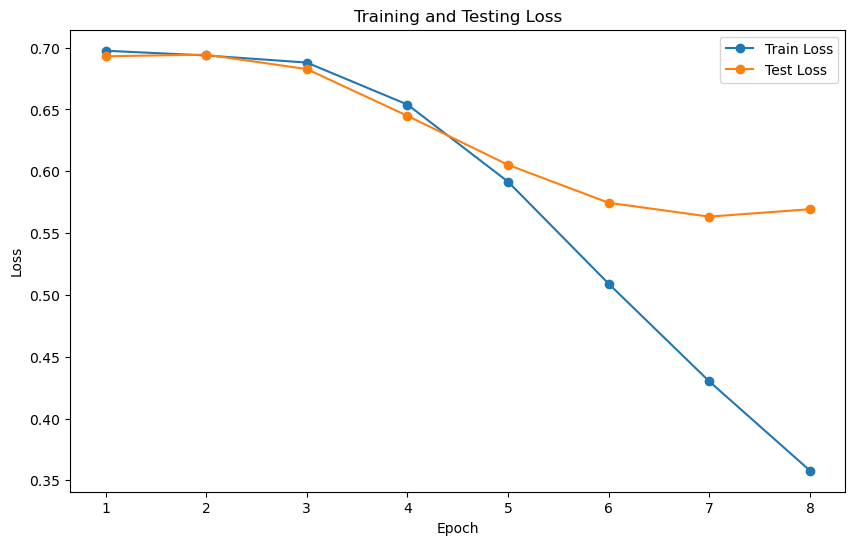

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss', marker='o')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss', marker='o')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [24]:
def predict_sentiment(review, model, vocab):
    model.eval()
    sequence = text_to_sequence(review, vocab)
    inputs = torch.LongTensor(sequence).unsqueeze(0)
    with torch.no_grad():
        outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    return predicted.item()

positive_review = "This is an awesome movie. A great way to spend an evening. Good acting and directing."
negative_review = "This is an awful movie. Better to spend 2 hours for anything else. I don't reccomend it."

positive_prediction = predict_sentiment(positive_review, model, vocab)
negative_prediction = predict_sentiment(negative_review, model, vocab)

print(f"Positive review prediction: {positive_prediction}")
print(f"Negative review prediction: {negative_prediction}")

Positive review prediction: 1
Negative review prediction: 1
